# Note
The following notebook still needs additional documentation, right now the purpose is to demonstrate it. 

# Demonstration

## Tracking a Line Through time

![basic-animation.gif](https://raw.githubusercontent.com/progressEdd/projects/master/Animating-Velocity-Graph/basic-animation.gif)

## Plotting a Dot and Tracking Across Velocity Curve 

![dot-tracking-animation.gif](https://raw.githubusercontent.com/progressEdd/projects/master/Animating-Velocity-Graph/dot-tracking-animation.gif)

# Importing Libraries + Loading Data

In [2]:
from IPython.core.display import display, HTML  
display(HTML("<style>.container { width:100% !important; }</style>"))

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [4]:
df = pd.read_csv("velocity.csv")
df

,Time (ms),Velocity
0,0,0.03
1,17,0.03
2,34,0.03
3,50,0.03
4,67,0.03
...,...,...
1314,22167,0.89
1315,22183,0.89
1316,22200,0.41
1317,22217,0.41


In [55]:
print("max time") 
display(df["Time (ms)"].max())

print("min time")
display(df["Time (ms)"].min())

print("Velocity")
display(df["Velocity"][1])

print("Max Velocity")
display(df["Velocity"].max())

print("Final time")
display(df["Time (ms)"].iloc[-1]*60/1000)

print("Final time rounded")
display(int(round(df["Time (ms)"].iloc[-1]*60/1000, 1)))

print("column titles")
column_titles = list(df.columns.values) 
display(column_titles)

display(df["Time (ms)"].index.name)

max time


22233

min time


0

Velocity


0.03

Max Velocity


20.5

Final time


1333.98

Final time rounded


1334

column titles


['Time (ms)', 'Velocity']

None

# Working Through <a href="https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/">Matplotlib Animation Tutorial</a>

I used Jake Vanderplas's sine wave example posted below as a base to understand how matplotlib animates. I modified it to make it work with the velocity and time data I was given from my friend. 

In [ ]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

## Having Line Plotted Through time

From the base I added my own modifications titled `Tracking a Line Through time`, which included
* setting variables for velocity (`y_df`) and time (`x_df`) dataframes
* setting maximums for x and y
* setting a `time_seconds` variable that converts the time in milliseconds to seconds
* setting a `framerate` variable that sets the framerate of the graph
* setting a `totalFrames` variable that sets the duration of the animation
* increasing the figure size from 64x64 to a bigger 18.5x10.4 inch higher resolution figure with `fig.set_size_inches()`
* increasing the framerate to 60 frames a second (setting `framerate` to `60`), which makes the plot smoother
   * only downside is that it will take extra time to encode the final mp4
* modifying the limits.
* adding titles for the figure
* having the the animation plot the figure as time passes, rather needing a known function to plot it

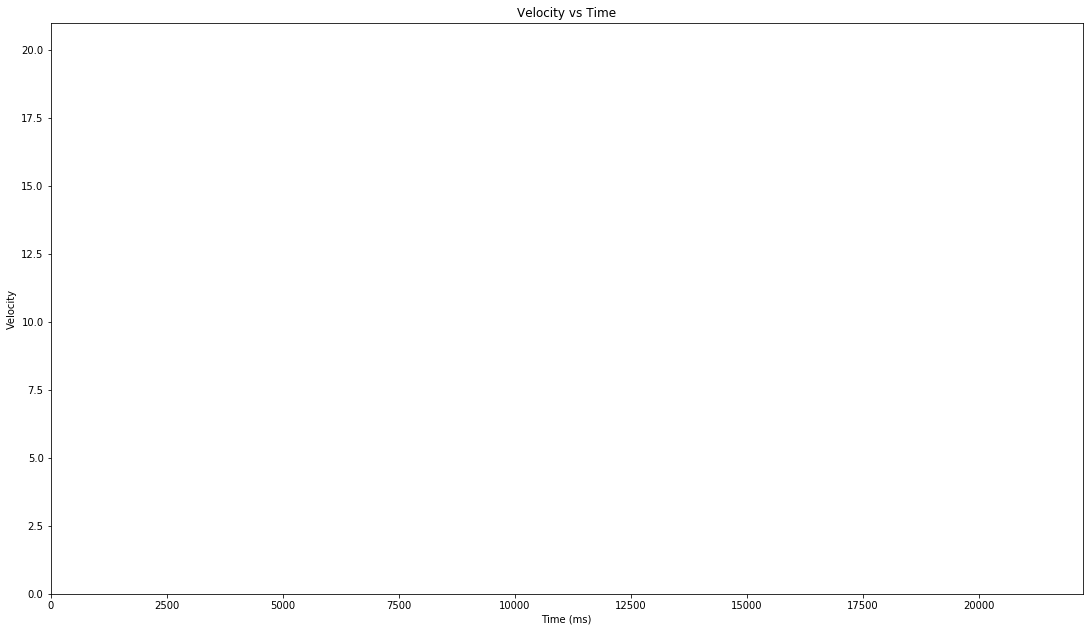

In [119]:
x_df = df["Time (ms)"]
y_df = df["Velocity"]
x_max = int(np.ceil(df["Time (ms)"].max()))
y_max = int(np.ceil(df["Velocity"].max()))

time_seconds = x_df.iloc[-1]/1000
framerate = 60
totalFrames = int(round(framerate * time_seconds))

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

# transparency settings for the figure
#fig.patch.set_alpha(0.)

ax = plt.axes(xlim=(0, x_max), ylim=(0, y_max))
ax.set(title='Velocity vs Time',
           ylabel="Velocity",
           xlabel="Time (ms)")

line, = plt.plot(x_df, y_df)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = x_df[0:i]
    #print("x")
    #print(x)
    y = y_df[0:i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames = totalFrames, interval=1, blit=False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=framerate, extra_args=['-vcodec', 'libx264'])

plt.show()

### print statements

I used these print statements to figure out why my maxes were not being rounded to the nearest whole number. 

Initially, I tried using `round( #number, #decimal places)`, <a href="https://stackoverflow.com/questions/31818050/round-number-to-nearest-integer">from Stackoverflow</a> but the native function concatenated for values such as `20.5` to `20` instead of `21` 

Eventually I found a detailed explanation behind the native python `round()` function <a href="https://realpython.com/python-rounding/">from RealPython</a>, in addition to suggested alternative functions and libraries I could use that would solve the issue I was running into. The suggestion was to use `ceil` from the `math` libraries. I ended up using `ceil` from the `numpy` libraries since I didn't want to import another library


In [ ]:
print("y_max:", df["Time (ms)"].max())
print()

print("y_max ceil rounding:", np.ceil(df["Time (ms)"].max()))
print()

print("x_max:", df["Velocity"].max())
print()

print("x_max ceil rounding:", np.ceil(df["Velocity"].max()))
print()

print("issue rounded y_max (Time):", int(round(df["Time (ms)"].max(),1)))
print()


print("issue rounded x_max (Velocity):", int(round(df["Velocity"].max(),1)))
print()

## Having a Dot Tracking Along the Velocity Curve 

After making my modifications, I copied my modified version and further adjusted it further titled `Having a Dot Tracking Along the Velocity Curve` to print the plot first and have a single point track along the plotted graph

Changes from the original `Having Line Plotted Through time`
* added red dot for tracking instead of line
    * used following additional arguments to set the dot `linestyle='none', marker = 'o', ms = 10, color='r'`, I learned of these parameters from adrian prince-whelan's demonstration of 
   <a href="https://adrian.pw/blog/matplotlib-transparent-animation/">Making a Matplotlib animation with a transparent background</a> 
    * `linestyle='none'` prevents lines from being drawn
    * `marker = 'o'` sets the dot 
    * `ms = 10` sets the dot size
    * `color='r'` sets the dot color
* messing with video transparency as well from the same post
    * main issue right now is getting the correct save settings
* changed x `linspace` value to have the previous frame
    * added conditional where at `i=0`, `i` would start at `0` instead of `-1` when calling the `x_df[i-1]` and `x_df[i]` dataframe entry
  

KeyError: 1319

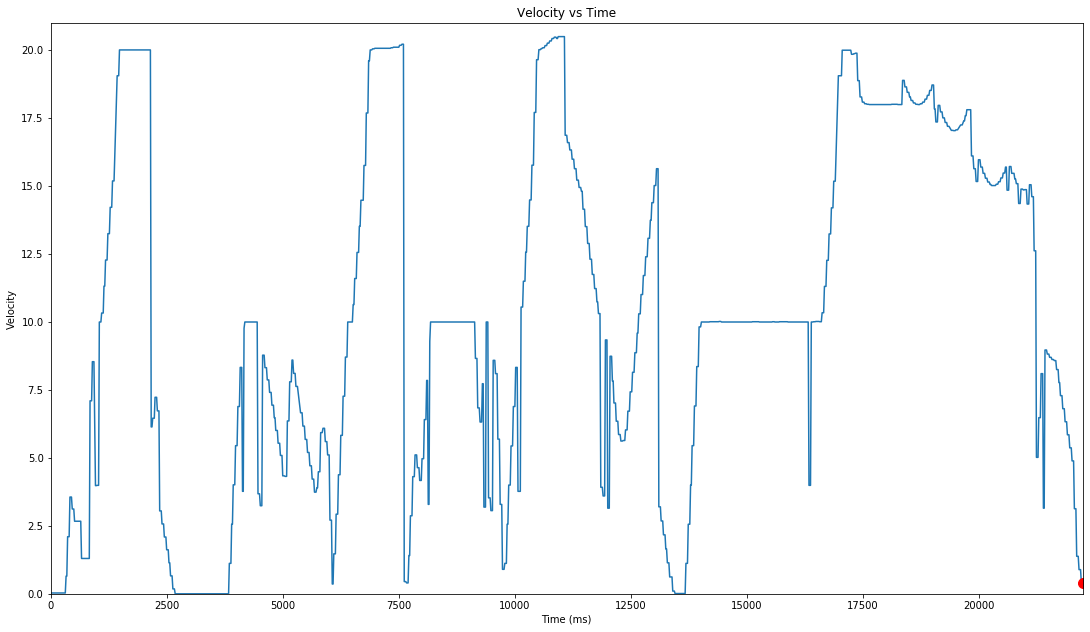

In [118]:
x_df = df["Time (ms)"]
y_df = df["Velocity"]
x_max = int(np.ceil(df["Time (ms)"].max()))
y_max = int(np.ceil(df["Velocity"].max()))

time_seconds = x_df.iloc[-1]/1000
framerate = 60
totalFrames = int(round(framerate * time_seconds))

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

# transparency settings for the figure
#fig.patch.set_alpha(0.)

ax = plt.axes(xlim=(0, x_max), ylim=(0, y_max))
ax.set(title='Velocity vs Time',
           ylabel="Velocity",
           xlabel="Time (ms)")

# transparency settings for the plot area
#ax.patch.set_facecolor('#ababab')
#ax.patch.set_alpha(0)

plt.plot(x_df, y_df)
line, = plt.plot([], [], linestyle='none', marker = 'o', ms = 10, color='r')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    if(i==0):
        a = i+1
    else:
        a = i
    x = x_df[i]
    #print("x")
    #print(x)
    y = y_df[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames = totalFrames, interval=1, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('dot_tracking_animation.mp4', fps=framerate, extra_args=['-vcodec', 'libx264'])

plt.show()

# Learning How Matplotlib plots

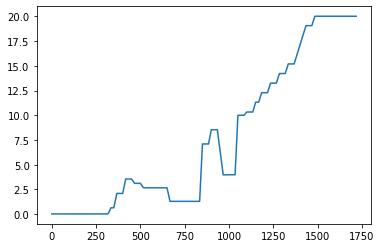

In [101]:
#plt.scatter(x_df,y_df)
plt.plot(x_df[0:100], y_df[0:100])
plt.show()